<a href="https://colab.research.google.com/github/Xiang990293/MachineLearning/blob/main/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 準備工作

## 安裝模組

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
import math
import matplotlib as mpl
from matplotlib.font_manager import fontManager as fm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## 下載中文字體 (from GrandmaCan)

In [ ]:
!pip install wget
import wget

wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=c6700ce44b1da2b4df8c666a17776afd2d66af49acd5f3efe384bd417d6dcb6f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

## 下載檔案 (from GrandmaCan)

### 線性回歸用資料

In [ ]:
url = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv'
data = pd.read_csv(url)
x = data["YearsExperience"]
y = data['Salary']
data

### 多元線性迴歸用資料

In [ ]:
url = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data2.csv'
data2 = pd.read_csv(url)
data2

,YearsExperience,EducationLevel,City,Salary
0,3.0,大學,城市A,45.9
1,7.8,碩士以上,城市C,80.5
2,2.3,高中以下,城市A,25.2
3,5.1,高中以下,城市A,30.4
4,10.0,碩士以上,城市B,65.7
5,1.2,碩士以上,城市C,60.8
6,8.6,大學,城市C,50.1
7,6.9,碩士以上,城市A,70.3
8,4.2,大學,城市A,40.7
9,2.4,高中以下,城市A,28.1


### 邏輯回歸

In [ ]:
url = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Classification/Diabetes_Data.csv'
data3 = pd.read_csv(url)
data3

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,男生,1
1,66,102,128.1,女生,1
2,59,65,103.9,男生,0
3,46,117,94.8,女生,0
4,45,79,57.8,男生,0
...,...,...,...,...,...
395,72,63,97.1,女生,0
396,22,117,156.7,女生,1
397,31,76,119.0,男生,0
398,36,65,96.3,女生,1


## 資料來源

* [1] 【機器學習 Machine Learning】3小時初學者教學 - GrandmaCan
 - https://www.youtube.com/watch?v=wm9yR1VspPs
* [2] Sigmoid function - WikiPedia
 - https://en.wikipedia.org/wiki/Sigmoid_function

# 2. 繪製出所有**年資(x)對應月薪(y)**

先將下載下來的**年資(x)對應月薪(y)**的圖繪製下來

這裡中文顯示的問題需要透過下載前面提供的字體來彌補
* figure()內的figsize定義圖表長寬
* scatter()在圖表中新增點
* title()定義圖表標題
* xlabel()定義圖表x軸座標軸標題
* ylabel()定義圖表y軸座標軸標題

Text(0, 0.5, '月薪(K)')

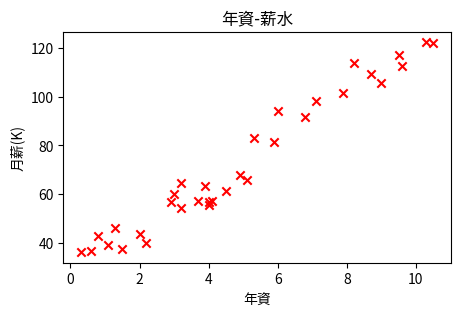

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x, y, marker = "x", color="red")
plt.title("年資-薪水")
plt.xlabel("年資")
plt.ylabel("月薪(K)")

#3. 簡單線性迴歸 - 找出迴歸直線

定義這些資料的迴歸線為：
y_pred = w\*x + b

把繪製迴歸線和資料點的程式碼包裝成函數，並代入假定的w=9和b=29

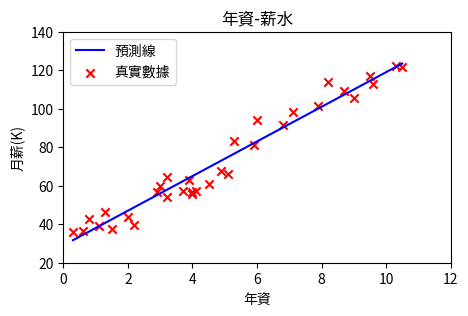

In [ ]:
def plot_pred(w, b):
  plt.figure(figsize=(5, 3))
  y_pred = w*x + b
  plt.plot(x, y_pred, label="預測線", color="blue")
  plt.scatter(x, y, label="真實數據", marker = "x", color="red")
  plt.title("年資-薪水")
  plt.xlabel("年資")
  plt.ylabel("月薪(K)")
  plt.xlim([0, 12])
  plt.ylim([20,140])
  plt.legend()
  plt.show()

plot_pred(9, 29)

可以使用ipywidgets模組中的interact函數來新增滑桿

讓w和b對迴歸直線產生的影響更直覺

In [ ]:
interact(plot_pred, w=(-20, 20, 1), b=(-100, 100, 1))

interactive(children=(IntSlider(value=0, description='w', max=20, min=-20), IntSlider(value=0, description='b'…

<function __main__.plot_pred(w, b)>

c. 最小平方法(least squares method)

## a. 回想之前高中學過的手算迴歸直線

高中數學曾經學過，迴歸直線的斜率可以通過標準差和相關係數求得，便可使用點斜式求得迴歸直線。

其中相關係數r又可以通過以下方法求得，以下是求得迴歸直線 y=w\*x+b 的過程：
1. 分別計算已知資料X和Y的平均
2. 計算各個項目的離均差(與平均相減之差)
3. 計算各個離均差的平方(將負號消去)
4. 計算同一資料點的x和y離均差的積(將離均差相乘)
5. 分別計算x和y的離均差平方總和
```
　　　　　|　１|　２|　３|　４|　５|平均
　　Ｘ　　|　６|　４|１０|　８|　２|　６
　　Ｙ　　|　７|　１|　９|　５|　３|　５
Ｘ的離均差|　０|－２|　４|　２|－４|
Ｙ的離均差|　２|－４|　４|　０|－２|總計
均差平方Ｘ|　０|　４|１６|　４|１６|４０
均差平方Ｙ|　４|１６|１６|　０|　４|４０
兩均差之積|　０|　８|１６|　０|　８|３２
(註：為方便對齊，本表除分隔線外使用全形字符和空格)
```
6. 將4.所得資料除以5.所得兩資料分別開根號之積
7. 6.之所得即為相關係數r
```
r 
= 兩均差乘積 / sqrt(均差平方X) * sqrt(均差平方Y)
= 32 / sqrt(40) * sqrt(40)
= 32 / 40
= 0.8
```
8. 標準差
```
= sqrt(變異數)
= sqrt(離均差平方平均)
= sqrt(離均差平方總和 / 資料數)
```
9. 標準差 
10. 迴歸直線斜率 w
```
w = 相關係數r * (標準差(x)/標準差(y))
以上列例子：
w 
= 0.8 * sqrt(40/5)/sqrt(40/5) 
= 0.8
```

* 註：
  * 離均差平方X 記做 Sxx
  * 離均差平方Y 記做 Syy
  * 兩均差積 記做 Sxy


11. 迴歸直線: (y - y的平均) = w \* (x - x的平均)

(y - 5) = 0.8 \* (x - 6)即為本例所求迴歸直線

## b. 讓python用這方法算算看年資和月薪的迴歸直線

一樣先下載資料

In [ ]:
url = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv'
data = pd.read_csv(url)

x = data["YearsExperience"]
y = data['Salary']

定義計算離均差的函數

In [ ]:
def deviation_from_mean(d):
  m = d.mean()
  temp_data = d - m
  return temp_data

### 定義S_xx、S_yy、S_xy
* S_xx: X的離均差平方
* S_yy: Y的離均差平方
* S_xy: XY離均差相乘

In [ ]:
dfmx = deviation_from_mean(x)
dfmy = deviation_from_mean(y)
s_xx = (dfmx * dfmx).sum()
s_yy = (dfmy * dfmy).sum()
s_xy = (dfmx * dfmy).sum()

### 定義相關係數與斜率

In [ ]:
r = s_xy / (math.sqrt(s_xx)*math.sqrt(s_yy))
w = r * (math.sqrt(s_yy/len(y))/math.sqrt(s_xx/len(x)))

剛剛說迴歸直線是：
```
(y - y的平均) = w * (x - x的平均)
```
在本例即
```
(y_pred - y.mean()) = w * (x - x.mean())
y_pred = ( w * (x - x.mean()) ) + y.mean()
y_pred = w * x - w * x.mean() + y.mean()
```
其中 w \* x.mean() 和 y.mean() 為常數，可以合併，

也就是先前提到的b

因此
```
b = - w * x.mean() + y.mean()
```

### 試著畫圖看看

跟原本的資料點一起繪製，並列印w和b的值

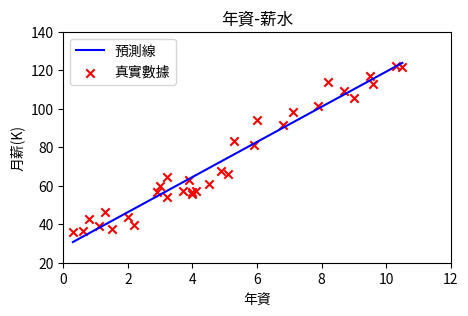

9.123739380610026 28.01107835708258


In [ ]:
b = -1 * w * x.mean() + y.mean()

plot_pred(w, b)
print(w, b)

### 利用找到的w和b組合製作迴歸直線預測月薪

In [ ]:
print(f"年資 3.5: {w * 3.5 + b}K")
print(f"年資 5.9: {w * 5.9 + b}K")

年資 3.5: 59.94416618921767K
年資 5.9: 81.84114070268174K


## c. 既然是電腦，試試暴力破解？

現在的目標，是讓python自己找到最適合的預測直線--迴歸直線

令「每個**真實資料點到預測直線的差**的平方和」是該預測直線的總分

這個總分越小，代表預測直線到真實資料點間的平均距離是越小的，當總分達到最小值，代表找到與各個真實資料點間的平均距離是越小預測直線。

此時稱該預測直線為迴歸直線，而這裡的**總分**對應到每個不同w和b的組合所繪製出來的圖形被稱為**成本函數(cost function)**。

即剛剛的**總分**即**成本**



### 定義成本函數

也就是不同b和w的組合下，預測直線與實際資料的落差總平均

In [ ]:
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2 #所有實際資料和預測值線的離均差平方
  cost = cost.mean() #為了讓成本函數圖形不要過度變形，取對離均差平方取平均

  return cost

In [ ]:
compute_cost(x, y, 10, 10)

227.88121212121214

### 當b=0時的成本函數長怎樣呢?

In [ ]:
costs = [compute_cost(x, y, i, 0) for i in range(-100, 101) ]
costs

Text(0, 0.5, 'costs')

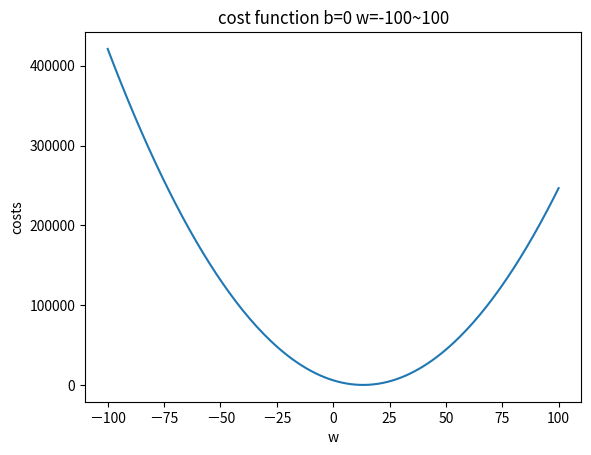

In [ ]:
plt.plot(range(-100, 101), costs)
plt.title("cost function b=0 w=-100~100")
plt.xlabel("w")
plt.ylabel("costs")

### 暴力破解！！

用numpy取-100到100的整數，

用for的巢狀迴圈遍歷所有w,b在[-100,100]的各個組合

In [ ]:
import numpy as np

ws = np.arange(-100, 101)
bs = np.arange(-100, 101)

costs = np.zeros((201, 201))

i=0
for w in ws:
  j=0
  for b in ws:
    cost = compute_cost(x, y, w, b)
    costs[i, j] = cost
    j = j+1
  i = i+1

### 繪製成本函數和尋找最小值

當w=[9], b=[29] 會有最小costs:[32.69484848]


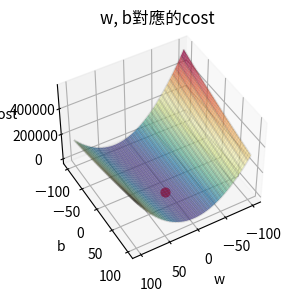

In [ ]:
fm.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(3, 3))
ax = plt.axes(projection="3d")
ax.view_init(45, 60) #攝影機和原點之連線 和 平面wb的夾角 和 與w軸正向之夾角

b_grid, w_grid = np.meshgrid(bs, ws)
ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.7)
ax.plot_wireframe(w_grid, b_grid, costs, color='black', alpha=0.1)

ax.set_title("w, b對應的cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)

print(f"當w={ws[w_index]}, b={bs[b_index]} 會有最小costs:{costs[w_index, b_index]}")

### 利用找到的w和b組合製作迴歸直線預測月薪

In [ ]:
print(f"年資 3.5: {ws[w_index] * 3.5 + bs[b_index]}K")
print(f"年資 5.9: {ws[w_index] * 5.9 + bs[b_index]}K")

年資 3.5: [60.5]K
年資 5.9: [82.1]K


## d. 梯度下降法 - 線性迴歸的**優化器**

### 定義梯度

梯度--任一點在圖上向兩軸的斜率

透過將
```
(y - y的預測值)^2
```
或是
```
(y - (w*x + b))^2
```
化成微分方程式，一個對w偏微分，一個對b偏微分
```
2*x*(w*x+b - y)
2 *(w*x+b - y)
```
這裡的2因為可以視為學習率的一部份，所以可以省略
```
x*(w*x+b - y)
 (w*x+b - y)
```

In [ ]:
def compute_gradient(x, y, w, b):
  w_gradient = (x*(w*x+b - y)).mean()
  b_gradient = ( (w*x+b - y)).mean()
  return w_gradient, b_gradient

In [ ]:
compute_gradient(x, y, 20, 10)

(268.54757575757577, 35.084848484848486)

### 定義梯度下降的迭代函式

利用類似牛頓法的方式，通過取線上斜率得知下一個點的移動方向和大小

回傳值包含：
* w的最終值
* b的最終值
* w的變化史
* b的變化史
* 成本的變化史


In [ ]:
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):
  c_hist = []
  w_hist = []
  b_hist = []
  
  w = w_init
  b = b_init
  
  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)
    
    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter==0:
      print(f"iteration {i:5}: Cost: {cost: .4e}, w: {w: .4e}, b: {b: .4e}, w_gradient: {w_gradient: .4e}, b_gradient: {b_gradient: .4e}")

  return w, b, w_hist, b_hist, c_hist

### 呼叫和執行梯度下降迭代函數

代入以下值：
* x = 真實資料值，代表年資
* y = 真實資料值，代表各個年資所對應的月薪
* w_init = 初始w值，等一下要跑迴圈
* b_init = 初始b值，等一下要跑迴圈
* learning_rate = 學習率，每次迭代時，w和b每次變動的倍率
* cost_function = 成本函數，這裡直接輸入剛剛的成本函數
* gradient_function = 梯度函數，這裡直接輸入剛剛的梯度函數
* run_iter = 迭代次數，代表w和b的迭代次數
* p_iter = 輸出中間結果時的迭代次數間距

In [ ]:
w_fin, b_fin, w_list, b_list, c_list = gradient_descent(x, y, -100, -100, 1.0e-2, compute_cost, compute_gradient, 10000, 1000)

### 繪出成本函數和點(w,b)的迭代路徑

當w=[9], b=[29] 會有最小costs:[32.69484848]


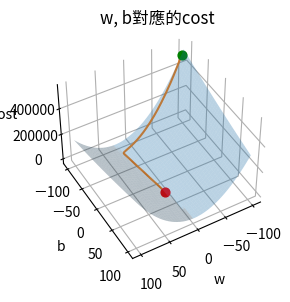

In [ ]:
fm.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(3, 3))
ax = plt.axes(projection="3d")
ax.view_init(45, 60) #攝影機和原點之連線 和 平面wb的夾角 和 與w軸正向之夾腳
ax.xaxis.set_pane_color((1, 1, 1)) #設定x平面是黑色(深色模式則會相反)
ax.yaxis.set_pane_color((1, 1, 1)) #設定y平面是黑色(深色模式則會相反)
ax.zaxis.set_pane_color((1, 1, 1)) #設定z平面是黑色(深色模式則會相反)


b_grid, w_grid = np.meshgrid(bs, ws)
ax.plot_surface(w_grid, b_grid, costs, alpha=0.3)
# ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.7)
# ax.plot_wireframe(w_grid, b_grid, costs, color='black', alpha=0.1)

ax.set_title("w, b對應的cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)
ax.scatter(w_list[0], b_list[0], c_list[0], color="green", s=40)
ax.plot(w_list, b_list, c_list)

print(f"當w={ws[w_index]}, b={bs[b_index]} 會有最小costs:{costs[w_index, b_index]}")

### 繪製迭代次數與成本的關係

Text(0, 0.5, 'cost')

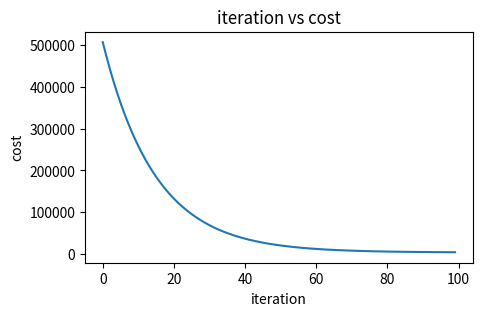

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(np.arange(0, 100), c_list[:100])
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")

### 輸出結果

In [ ]:
print(f"最終w b=({w_fin:.2f}, {b_fin:.2f})")

最終w b=(9.14, 27.89)


### 利用找到的w和b組合製作迴歸直線預測月薪

In [ ]:
print(f"年資 3.5: {w_fin* 3.5 + b_fin}K")
print(f"年資 5.9: {w_fin* 5.9 + b_fin}K")

年資 3.5: 56.35535373546275K
年資 5.9: 80.97877752760868K


#4. 多元線性迴歸

利用以下式子：

y = w1\*x1 + w2\*x2 + w3\*x3 + ... + b

計算所有特徵與y之間的關係

先來看看資料內容

In [ ]:
data2

## 有等級關係的轉換 - Label Encoding

首先對非數字特徵進行數值轉換

In [ ]:
data2["EducationLevel"] = data2["EducationLevel"].map({"高中以下":0, "大學":1, "碩士以上": 2})
data2

,YearsExperience,EducationLevel,City,Salary
0,3.0,1,城市A,45.9
1,7.8,2,城市C,80.5
2,2.3,0,城市A,25.2
3,5.1,0,城市A,30.4
4,10.0,2,城市B,65.7
5,1.2,2,城市C,60.8
6,8.6,1,城市C,50.1
7,6.9,2,城市A,70.3
8,4.2,1,城市A,40.7
9,2.4,0,城市A,28.1


## 沒有等級關係的特徵轉換 - One Hot Encoding

值得一提的是，若分類項目總數固定，則可以選擇其中一項目省略，利用其他的項目推敲，以簡化運算

In [ ]:
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(data2[["City"]]) #需要傳入二維矩陣

city_encoded = onehot_encoder.transform(data2[["City"]]).toarray()
city_encoded

array([[ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  1.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 0.00e+00,  1.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 0.00e+00,  1.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.0

將City替換成三個類別，但第三個類別可以推敲，所以可以忽略、捨棄

In [ ]:
data2[["CityA","CityB","CityC"]] = city_encoded

data2 = data2.drop(["City", "CityC"], axis=1)
data2

,YearsExperience,EducationLevel,Salary,CityA,CityB
0,3.0,1,45.9,1.0,0.0
1,7.8,2,80.5,0.0,0.0
2,2.3,0,25.2,1.0,0.0
3,5.1,0,30.4,1.0,0.0
4,10.0,2,65.7,0.0,1.0
5,1.2,2,60.8,0.0,0.0
6,8.6,1,50.1,0.0,0.0
7,6.9,2,70.3,1.0,0.0
8,4.2,1,40.7,1.0,0.0
9,2.4,0,28.1,1.0,0.0


## 資料集分割

將資料分成訓練集和測試集兩類，來訓練和檢驗預測的效果
這裡取8成作為訓練資料，2成做為測試資料

In [ ]:
# from sklearn.model_selection import train_test_split
x = data2[["YearsExperience", "EducationLevel", "CityA", "CityB"]]
y = data2["Salary"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #取隨機2成作為測試集, 可額外傳入random_state=2來決定隨機種子
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

## 特徵縮放

透過將各個特徵標準化，讓所有特徵金亮介在相同區間，可以讓梯度下降的效率提高

標準化 = (值 - 平均)/標準差

In [ ]:
# from sklearn.preprocessing import StanderScaler

scaler = StandardScaler()
scaler.fit(x_train) #計算測試集的平均和標準差，用以標準化
x_train = scaler.transform(x_train)
# 測試集的標準化也採用與訓練集相同的值操作
x_test = scaler.transform(x_test)

## 定義預測函數

讓各個特徵乘以各自權重後，加上一數字b，作為其預測函數
```
y_pred = (w*x_train).sum(axis=1) + b
```

## 定義成本函數

In [ ]:
def compute_cost(x, y, w, b):
  y_pred = (x*w).sum(axis=1) + b
  return ((y - y_pred)**2).mean()

## 定義梯度函數

利用簡單線性迴歸時使用的「優化模型(Optimizer)-梯度下降法」來預測資料

同樣利用偏微分，分別以w1、w2、w3、w4、b對
```
(y_pred - w1*x1 + w2*x2 + w3*x3 + w4*x4 + b)^2
```
或者
```
(y_pred - y)^2
```
偏微分，可得
```
w1_gradient = 2*(x1*(y_pred - y))
w2_gradient = 2*(x2*(y_pred - y))
w3_gradient = 2*(x3*(y_pred - y))
w4_gradient = 2*(x4*(y_pred - y))
b_gradient = 2*(y_pred - y)
```
同樣，係數2可以與後續的學習率合併，因此簡化成：
```
w1_gradient = (x1*(y_pred - y))
w2_gradient = (x2*(y_pred - y))
w3_gradient = (x3*(y_pred - y))
w4_gradient = (x4*(y_pred - y))
b_gradient = (y_pred - y)
```
利用for迴圈可簡化成：
```
for i in range(x.shape[1]):
    w_gradient = (x[:,i]*(y_pred - y)).mean()
```


In [ ]:
def compute_gradient(x, y, w, b):
  y_pred = (x*w).sum(axis=1) + b
  b_gradient = (y_pred - y).mean()
  w_gradient = np.zeros(x.shape[1])

  for i in range(x.shape[1]):
    w_gradient = (x[:,i]*(y_pred - y)).mean()

  return w_gradient, b_gradient

## 定義梯度下降的迭代函數

In [ ]:
np.set_printoptions(formatter={'float':'{: .2e}'.format})
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter=10000, p_iter=1000):
  c_hist = []
  w_hist = []
  b_hist = []
  
  w = w_init
  b = b_init
  
  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)
    
    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter==0:
      print(f"iteration {i:5}: Cost: {cost: .4e}, w: {w}, b: {b: .2e}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

## 尋找最佳參數組

In [ ]:
w_init = np.array([1,2,2,4])
w_final, b_final, w_list, b_list, c_list = gradient_descent(x_train, y_train, w_init, b_init=0, learning_rate=0.005, cost_function = compute_cost, gradient_function = compute_gradient, run_iter=10000, p_iter=1000)

iteration     0: Cost:  3.1427e+03, w: [ 1.00e+00  2.00e+00  2.00e+00  4.00e+00], b:  2.70e-01, w_gradient: -7.67e-02, b_gradient: -5.40e+01
iteration  1000: Cost:  2.5215e+02, w: [ 1.05e+00  2.05e+00  2.05e+00  4.05e+00], b:  5.37e+01, w_gradient: -3.19e-05, b_gradient: -3.59e-01
iteration  2000: Cost:  2.5202e+02, w: [ 1.05e+00  2.05e+00  2.05e+00  4.05e+00], b:  5.40e+01, w_gradient: -1.33e-08, b_gradient: -2.39e-03
iteration  3000: Cost:  2.5202e+02, w: [ 1.05e+00  2.05e+00  2.05e+00  4.05e+00], b:  5.40e+01, w_gradient: -5.53e-12, b_gradient: -1.59e-05
iteration  4000: Cost:  2.5202e+02, w: [ 1.05e+00  2.05e+00  2.05e+00  4.05e+00], b:  5.40e+01, w_gradient: -2.05e-14, b_gradient: -1.06e-07
iteration  5000: Cost:  2.5202e+02, w: [ 1.05e+00  2.05e+00  2.05e+00  4.05e+00], b:  5.40e+01, w_gradient: -2.05e-14, b_gradient: -7.05e-10
iteration  6000: Cost:  2.5202e+02, w: [ 1.05e+00  2.05e+00  2.05e+00  4.05e+00], b:  5.40e+01, w_gradient: -2.03e-14, b_gradient: -4.71e-12
iteration  70

## 結果列印

In [ ]:
y_pred = (w_final * x_test).sum(axis=1) + b_final
pd.DataFrame({
    "y_pred": y_pred,
    "y_test": y_test,
})

,y_pred,y_test
23,50.280205,58.0
3,50.324255,30.4
28,50.284650,29.7
5,50.042580,60.8
15,50.191957,55.6
8,52.669943,40.7
27,49.294545,24.9
24,50.112749,48.3


## 成效檢視

In [ ]:
compute_cost(x_test, y_test, w_final, b_final)

220.86592897751416

#5. 邏輯迴歸

若結果只會有「是」和「否」，則可以使用邏輯迴歸

## One Hot Encoding

首先轉換性別，是男生為1，非男生為0

In [ ]:
data3["Gender"] = data3["Gender"].map({"男生":1,"女生":0})

In [ ]:
# from sklearn.model_selection import train_test_split
x = data3[["Age", "Weight", "BloodSugar", "Gender"]]
y = data3["Diabetes"]

## 資料集分割

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #取隨機2成作為測試集, 可額外傳入random_state=2來決定隨機種子
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

## 特徵縮放

In [ ]:
# from sklearn.preprocessing import StanderScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## 定義開關函數 - S型函數

這次要用以預測的函數稱為：

**S型函數(Sigmoid Function)**

先設多元線性函數：
```
z = w1*x1 + w2*x2 + ... + b
```
使用的S型函數如下：
```
y = 1 / (1 + e^(-z))
```
該函數的目的在於將原本多元線性函數的值域變換到(0,1)的範圍，

如此才能利用之前使用的方法，透過成本函數進行梯度下降法。

---

本例使用之**S型函數(sigmoid function)**，其實有很多函數都符合，但本例使用最常見的 1/(1+exp(x))，常被用在人工神經網路，其函數也被稱為是**邏輯函數(logistic function)**。

其他**S型函數(sigmoid function)**包含：- 資料來源[2]
* 雙曲正切函數 tanh(x)
* 反正切函數 arctan(x)
* 古德曼函數
* 誤差函數
* 廣義邏輯函數
* 平滑步函數
* 其他的一些代數函數 1/(1+|x|^a)^(1/a)

**邏輯函數(logistic function)**同時也是邏輯迴歸的模型，就好比簡單線性迴歸的直線方程式，和多元線性迴歸的多元方程式。

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

## 定義預測函數

與多元線性回歸相同，將多個特徵各自乘上各自權重w，最後加上偏移量b。
```
z = (w*x_train).sum(axis=1) + b
```

## 定義成本函數

In [ ]:
def compute_cost(x, y, w, b):
  z = (w*x_train).sum(axis=1) + b
  z = sigmoid(z)
  return ((y - z)**2).mean()

## 定義梯度函數

我們有了預測函數
```
z = w1*x1 + w2*x2 + w3*x3 + w4*x4 + b
y_pred = 1 / (1 + e^(-z))
```
以及用來計算的成本函數
```
cost = (y_pred - y)^2
```
同樣地，要使成本函數對各個w和b偏微分，這一次要偏微分的方程式結合S型函數和預測函數：
得：
```
w1_gradient = 2*(x1*(y_pred - y)*(-z * e^(-z)*y_pred**2))
w2_gradient = 2*(x2*(y_pred - y)*(-z * e^(-z)*y_pred**2))
w3_gradient = 2*(x3*(y_pred - y)*(-z * e^(-z)*y_pred**2))
w4_gradient = 2*(x4*(y_pred - y)*(-z * e^(-z)*y_pred**2))
b_gradient = 2*((y_pred - y)*(-z * e^(-z)*y_pred**2))
```
同樣，係數2可以與後續的學習率合併，因此簡化成：
```
w1_gradient = x1*(y_pred - y)*(-z * e^(-z)*y_pred**2)
w2_gradient = x2*(y_pred - y)*(-z * e^(-z)*y_pred**2)
w3_gradient = x3*(y_pred - y)*(-z * e^(-z)*y_pred**2)
w4_gradient = x4*(y_pred - y)*(-z * e^(-z)*y_pred**2)
b_gradient = (y_pred - y)*(-z * e^(-z)*y_pred**2)
```
利用for迴圈可簡化成：
```
b_gradient = ((y_pred - y)*(-z * e^(-z)*y_pred**2)).mean()
for i in range(x.shape[1]):
    w_gradient = (x[:,i]*(y_pred - y)**(-z * e^(-z)*y_pred**2)).mean()
```

In [ ]:
def compute_gradient(x, y, w, b):
  z = (x*w).sum(axis=1) + b
  y_pred = sigmoid(z)
  e = np.exp(-z)
  d = z * e*y_pred**2
  b_gradient = ((y_pred - y)*d).mean()
  w_gradient = np.zeros(x.shape[1])
  
  for i in range(x.shape[1]):
      w_gradient = (x[:,i]*(y_pred - y)*d).mean()

  return w_gradient, b_gradient

## 定義梯度下降的迭代函數

In [ ]:
np.set_printoptions(formatter={'float':'{: .2e}'.format})
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter=10000, p_iter=1000):
  c_hist = []
  w_hist = []
  b_hist = []
  
  w = w_init
  b = b_init
  
  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)
    
    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter==0:
      print(f"iteration {i:5}: Cost: {cost: .4e}, w: {w}, b: {b: .2e}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

## 尋找最佳參數組

In [ ]:
w_init = np.array([1,2,2,4])
w_final, b_final, w_list, b_list, c_list = gradient_descent(x_train, y_train, w_init, b_init=0, learning_rate=0.005, cost_function = compute_cost, gradient_function = compute_gradient, run_iter=10000, p_iter=1000)

iteration     0: Cost:  3.0435e-01, w: [ 1.00e+00  2.00e+00  2.00e+00  4.00e+00], b: -1.37e-04, w_gradient:  1.31e-02, b_gradient:  2.74e-02
iteration  1000: Cost:  3.0209e-01, w: [ 9.34e-01  1.93e+00  1.93e+00  3.93e+00], b: -1.39e-01, w_gradient:  1.31e-02, b_gradient:  2.80e-02
iteration  2000: Cost:  2.9986e-01, w: [ 8.69e-01  1.87e+00  1.87e+00  3.87e+00], b: -2.81e-01, w_gradient:  1.29e-02, b_gradient:  2.88e-02
iteration  3000: Cost:  2.9761e-01, w: [ 8.05e-01  1.81e+00  1.81e+00  3.81e+00], b: -4.27e-01, w_gradient:  1.25e-02, b_gradient:  2.97e-02
iteration  4000: Cost:  2.9523e-01, w: [ 7.45e-01  1.74e+00  1.74e+00  3.74e+00], b: -5.77e-01, w_gradient:  1.18e-02, b_gradient:  3.06e-02
iteration  5000: Cost:  2.9263e-01, w: [ 6.88e-01  1.69e+00  1.69e+00  3.69e+00], b: -7.32e-01, w_gradient:  1.08e-02, b_gradient:  3.15e-02
iteration  6000: Cost:  2.8970e-01, w: [ 6.37e-01  1.64e+00  1.64e+00  3.64e+00], b: -8.92e-01, w_gradient:  9.60e-03, b_gradient:  3.22e-02
iteration  70

## 成效檢視

In [ ]:
compute_cost(x_test, y_test, w_final, b_final)

ValueError: ignored

In [ ]:
x_train, y_train, x_test, y_test

(array([[ 3.90e-01,  1.10e+00,  4.59e-01, -1.04e+00],
        [-1.19e+00, -1.55e+00, -1.12e+00,  9.57e-01],
        [ 8.16e-01, -1.83e-01,  7.41e-01, -1.04e+00],
        ...,
        [-8.87e-01,  1.15e+00, -9.91e-01,  9.57e-01],
        [ 8.77e-01,  1.10e+00,  3.84e-01, -1.04e+00],
        [ 2.08e-01,  1.10e+00, -1.11e+00,  9.57e-01]]),
 322    1
 258    0
 211    0
 0      1
 397    0
       ..
 8      1
 16     1
 379    0
 58     0
 112    0
 Name: Diabetes, Length: 320, dtype: int64,
 array([[-1.80e+00,  1.23e+00,  6.36e-01,  9.57e-01],
        [ 5.73e-01, -5.46e-02, -6.56e-01,  9.57e-01],
        [ 1.61e+00, -1.38e+00, -1.67e+00, -1.04e+00],
        [-6.44e-01,  1.53e+00,  1.11e+00,  9.57e-01],
        [ 1.47e-01, -1.47e+00,  3.16e-02,  9.57e-01],
        [ 1.24e+00, -7.83e-01,  2.04e-01,  9.57e-01],
        [ 1.18e+00,  3.31e-01,  1.64e+00, -1.04e+00],
        [-8.87e-01,  1.53e+00, -3.48e-01,  9.57e-01],
        [-1.74e+00, -1.47e+00, -1.25e+00,  9.57e-01],
        [ 5.73e-01, -